In [69]:
import numpy as np 

In [70]:
import pandas as pd

In [71]:
import matplotlib.pyplot as plt

In [72]:
%matplotlib inline

In [73]:
import nltk

In [74]:
import seaborn as sns

In [75]:
import string

In [76]:
DF=pd.read_csv('spam.csv',encoding='latin-1')
DF.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [77]:
DF=DF.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
DF.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [78]:
DF.v1.value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [79]:
DF.shape

(5572, 2)

In [80]:
for i in range(0,5572):
    if DF['v1'][i]=="spam":
        DF['v1'][i]=1
    else:
        DF['v1'][i]=0
DF['v1']

C:\Users\Abhikesh More\AppData\Local\Temp\ipykernel_13392\3970840689.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  DF['v1'][i]=0
C:\Users\Abhikesh More\AppData\Local\Temp\ipykernel_13392\3970840689.py:3: FutureWarning: ChainedAssignmen

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: object

In [81]:
DF.v1.value_counts()

v1
0    4825
1     747
Name: count, dtype: int64

In [82]:
DF.rename(columns={'v1':'target','v2':'text'},inplace=True)
DF.sample(10)

,target,text
790,0,This is hoping you enjoyed your game yesterday...
2466,0,He is world famamus....
861,0,Your brother is a genius
5552,0,Have a safe trip to Nigeria. Wish you happines...
2445,0,The guy (kadeem) hasn't been selling since the...
4805,0,Call me when u finish then i come n pick u.
80,0,"Sorry, I'll call later"
2408,0,Dear where you will be when i reach there
867,1,PRIVATE! Your 2003 Account Statement for 07808...
948,0,Chk in ur belovd ms dict


In [83]:
DF.duplicated().sum()

403

In [84]:
DF=DF.drop_duplicates(keep='first')
DF.duplicated().sum()

0

In [85]:
DF.shape

(5169, 2)

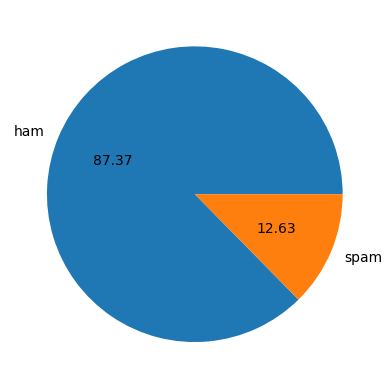

In [86]:
plt.pie(DF['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [87]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Abhikesh
[nltk_data]     More\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [88]:
DF['num_char']=DF['text'].apply(len)
DF.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [89]:
DF['num_word']=DF['text'].apply(lambda x:len(nltk.word_tokenize(x)))
DF.head()

,target,text,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [90]:
DF['num_sent']=DF['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
DF.head()

,target,text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [91]:
DF.describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_sent', ylabel='Count'>

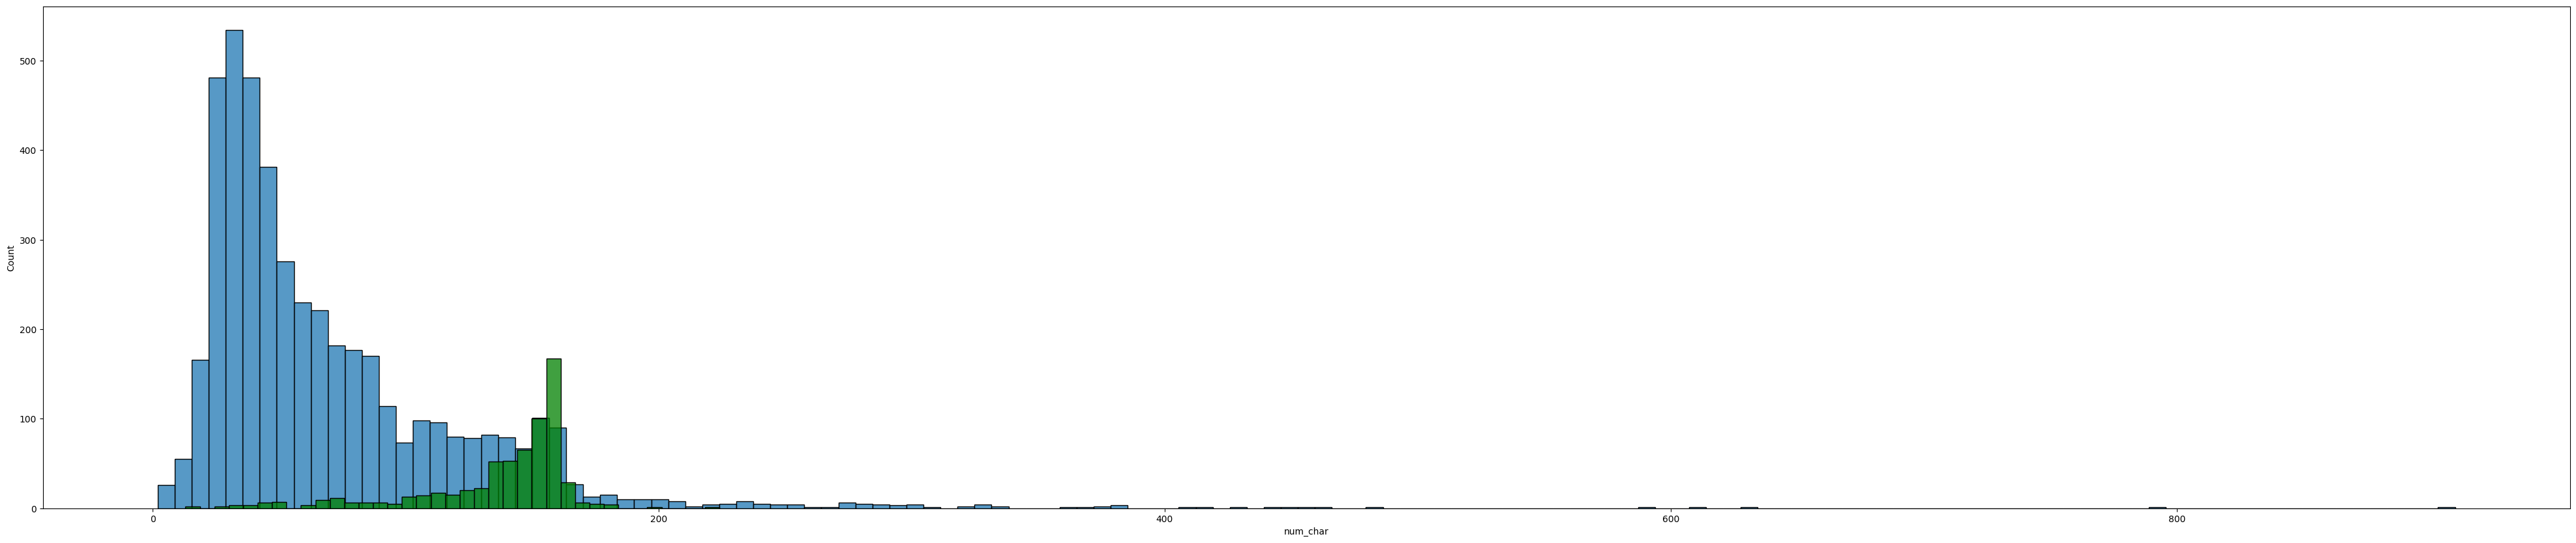

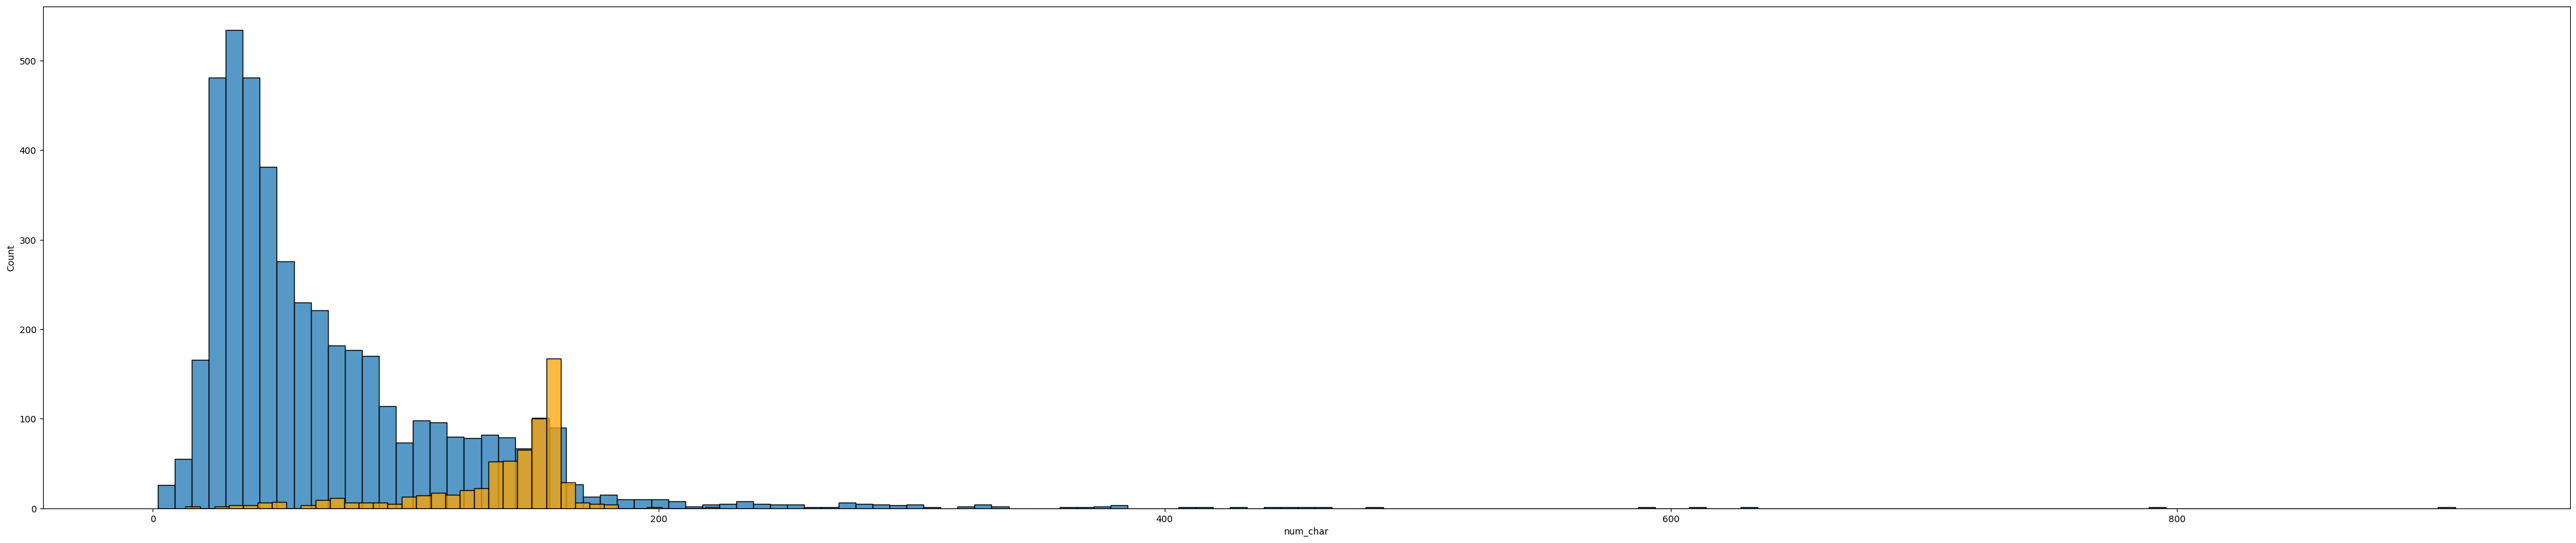

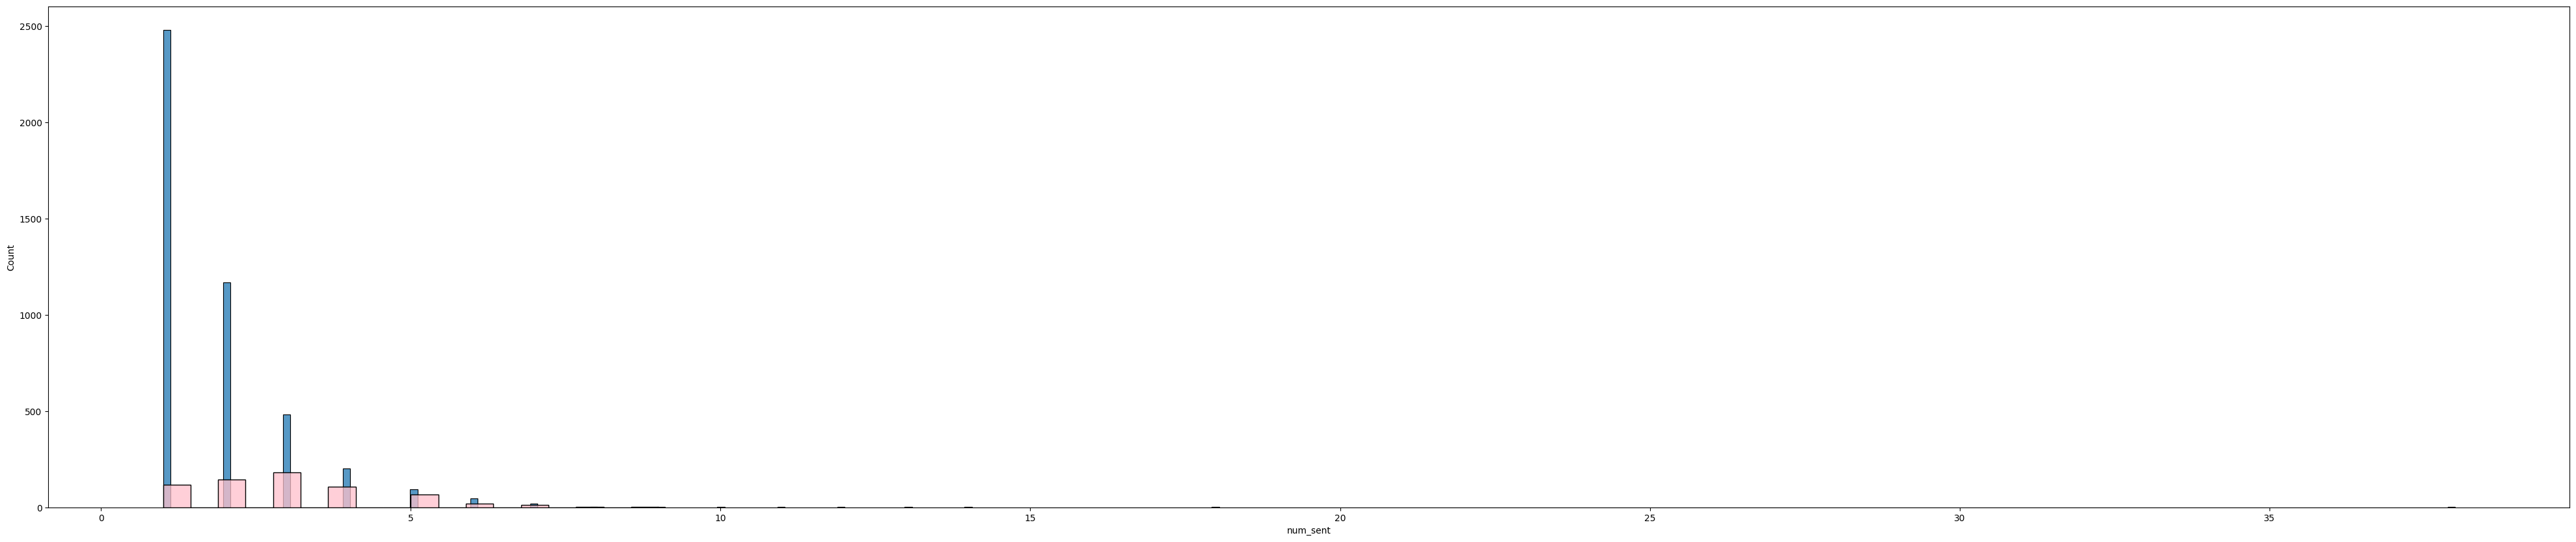

In [92]:
plt.figure(figsize=(50,10))
sns.histplot(DF[DF['target']==0]['num_char'])
sns.histplot(DF[DF['target']==1]['num_char'],color='green')

plt.figure(figsize=(50,10))
sns.histplot(DF[DF['target']==0]['num_char'])
sns.histplot(DF[DF['target']==1]['num_char'],color='orange')

plt.figure(figsize=(50,10))
sns.histplot(DF[DF['target']==0]['num_sent'])
sns.histplot(DF[DF['target']==1]['num_sent'],color='pink')

<Figure size 3000x1000 with 0 Axes>

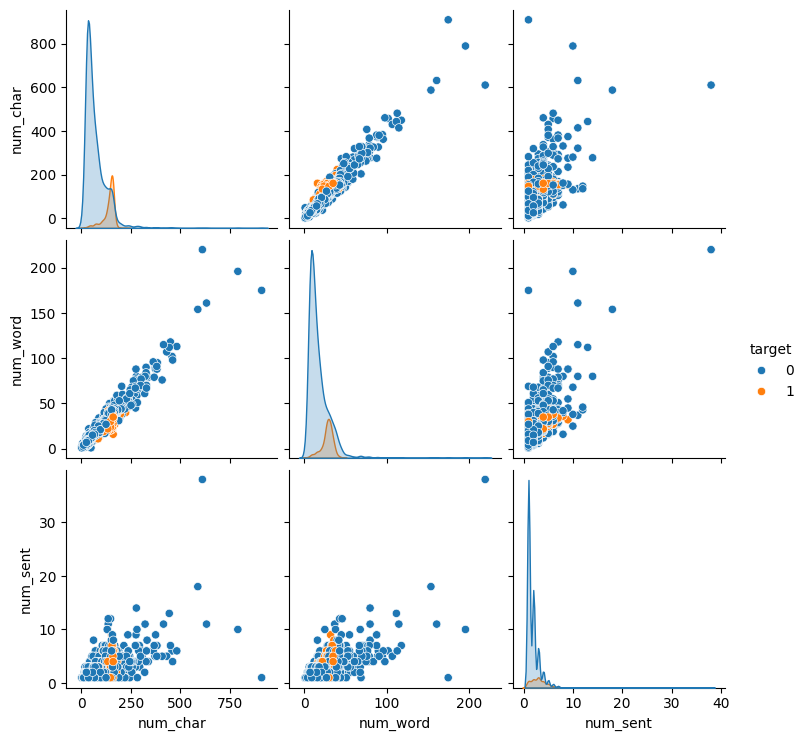

In [93]:
plt.figure(figsize=(30,10))
sns.pairplot(DF,hue='target')

In [94]:
DF.head()

,target,text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [95]:
DF.describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [96]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('sleeping')

'sleep'

In [97]:
def transform_text(text):
    text=text.lower()
    text= nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i) 
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('English') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
      y.append(ps.stem(i))
    return " ".join(y)

In [63]:
DF.head(10)

,target,text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3
